In [1]:
import input as i
import alg_google as a_g
import alg as a
import numpy as np
from importlib import reload
reload(i); reload(a);
import matplotlib.pyplot as plt
import pandas as pd
import time

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

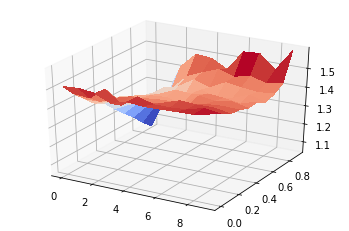

In [2]:
'''DPOA'''

# X = np.arange(0,1,0.1)
# Y = np.arange(0,100,1)
w = np.arange(0,1,0.1)
std_list= np.arange(0,10,1)
Z = []
Z1 = []
# w, std_list = np.meshgrid(X, Y)
# w = 0.3
# std_list = np.arange(0,100,1)
repeat = 1000
r_ratio = np.zeros((len(std_list), repeat))
for idx,omega in enumerate(w):
    for id,std in enumerate(std_list):
        for j in np.arange(repeat):
            ins = i.Instance(B=50, predictor_std=std)
            
            alg = a.DPOA(ins, omega)
            opt = a.OPT(ins)
            r_ratio[id, j] = alg/opt
    avg_ratio = np.mean(r_ratio, axis=1)
    Z.append(avg_ratio)

Z = np.array(Z)
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(std_list,w)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

r_ratio1 = np.zeros((len(std_list), repeat))
for idx,omega in enumerate(w):
    for id,std in enumerate(std_list):
        for j in np.arange(repeat):
            ins = i.Instance(B=50, predictor_std=std)
            
            alg = a_g.DPOA_google(ins, omega)
            opt = a.OPT(ins)
            r_ratio1[id, j] = alg/opt
    avg_ratio = np.mean(r_ratio1, axis=1)
    Z1.append(avg_ratio)

# print(Z1)
    

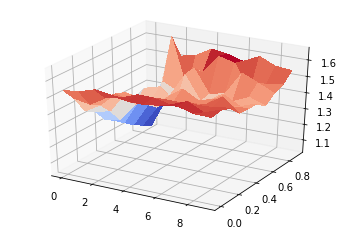

In [5]:
'''RPOA'''

w = np.arange(0,1,0.1)
std_list= np.arange(0,10,1)
Z2 = []
Z3 = []
alg_reps = 50
repeat = 100

r_ratio2 = np.zeros((len(std_list), repeat))
r_ratio3 = np.zeros((len(std_list), repeat))


for idx,omega in enumerate(w):
    for id, std in enumerate(std_list):
        for j in np.arange(repeat):
            ins = i.Instance(B=50, predictor_std=std)
            alg_total = 0
            for l in range(alg_reps):
                alg_total += a.RPOA(ins, omega)
            alg_avg = alg_total/alg_reps
            opt = a.OPT(ins)
            r_ratio2[id, j] = alg_avg/opt
    avg_ratio = np.mean(r_ratio2, axis=1)
    Z2.append(avg_ratio)
    
for idx,omega in enumerate(w):
    for id, std in enumerate(std_list):
        for j in np.arange(repeat):
            ins = i.Instance(B=50, predictor_std=std)
            alg_total = 0
            for l in range(alg_reps):
                alg_total += a_g.RPOA_google(ins, omega)
            alg_avg = alg_total/alg_reps
            opt = a.OPT(ins)
            r_ratio3[id, j] = alg_avg/opt
    avg_ratio = np.mean(r_ratio3, axis=1)
    Z3.append(avg_ratio)

Z2 = np.array(Z2)
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(std_list,w)

surf = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [ ]:
np.savetxt('output.csv',X,delimiter=",")
np.savetxt('output1.csv',Y,delimiter=",")
np.savetxt('output2.csv',Z,delimiter=",")
np.savetxt('output3.csv',Z1,delimiter=",")
np.savetxt('output4.csv',Z2,delimiter=",")
np.savetxt('output5.csv',Z3,delimiter=",")

In [6]:
Z2

array([[1.53848553, 1.54750036, 1.57746574, 1.56206982, 1.54568619,
        1.54385843, 1.55824415, 1.57136339, 1.54585156, 1.54277974],
       [1.46075542, 1.44377192, 1.49934019, 1.5158762 , 1.55313532,
        1.55061252, 1.52831851, 1.56652801, 1.51882348, 1.5529728 ],
       [1.35228609, 1.40742607, 1.49190277, 1.45696919, 1.48234109,
        1.51253059, 1.51062139, 1.51393495, 1.51812868, 1.53304951],
       [1.31788671, 1.33906035, 1.46841334, 1.44884627, 1.42393357,
        1.46198871, 1.4750202 , 1.48557611, 1.5492951 , 1.47196509],
       [1.23598621, 1.25300078, 1.36652855, 1.40396032, 1.44209511,
        1.512718  , 1.4589688 , 1.48819305, 1.46001356, 1.46698805],
       [1.19579671, 1.3214754 , 1.43422131, 1.46072994, 1.37957293,
        1.37069673, 1.42119456, 1.48109918, 1.42955853, 1.46307861],
       [1.14994712, 1.30751835, 1.32582397, 1.36945802, 1.5204485 ,
        1.37535065, 1.42362421, 1.41001715, 1.45366096, 1.42135476],
       [1.10312823, 1.25305417, 1.4120446

In [7]:
Z3

[array([1.5753544 , 1.59613326, 1.57229875, 1.61975582, 1.5980422 ,
        1.56703214, 1.56769743, 1.58630249, 1.58650162, 1.60747341]),
 array([1.50452641, 1.50540398, 1.5155005 , 1.50390454, 1.51839588,
        1.49260797, 1.53075846, 1.50846282, 1.49215152, 1.50849374]),
 array([1.42477069, 1.42288946, 1.40800981, 1.41547828, 1.42142144,
        1.41839042, 1.4196023 , 1.42655351, 1.42048635, 1.41613308]),
 array([1.33060566, 1.33993466, 1.34695416, 1.33799288, 1.34142922,
        1.33722616, 1.33385519, 1.3622784 , 1.34683647, 1.34470757]),
 array([1.27084078, 1.26590279, 1.26700135, 1.26487765, 1.2836946 ,
        1.25161353, 1.25984256, 1.28293883, 1.28399217, 1.29576888]),
 array([1.18816223, 1.20247984, 1.19361044, 1.21987218, 1.21263541,
        1.20067131, 1.21163051, 1.1896037 , 1.19469254, 1.22600948]),
 array([1.12431497, 1.13641106, 1.13236602, 1.13782012, 1.13743243,
        1.13554042, 1.12872905, 1.14582345, 1.14665478, 1.13229398]),
 array([1.08048332, 1.08076714, 1.